<a href="https://colab.research.google.com/github/Gajalakshmisubramani/deeplearning_codes/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install opencv-python

##1(a) HISTOGRAM EQUALIZATION  #Distribution of equal intensitylevel

In [ ]:
# Importing Libraries

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Reading the file

img = cv2.imread('/content/1.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Equalizes the Histogram based on the image matrix
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

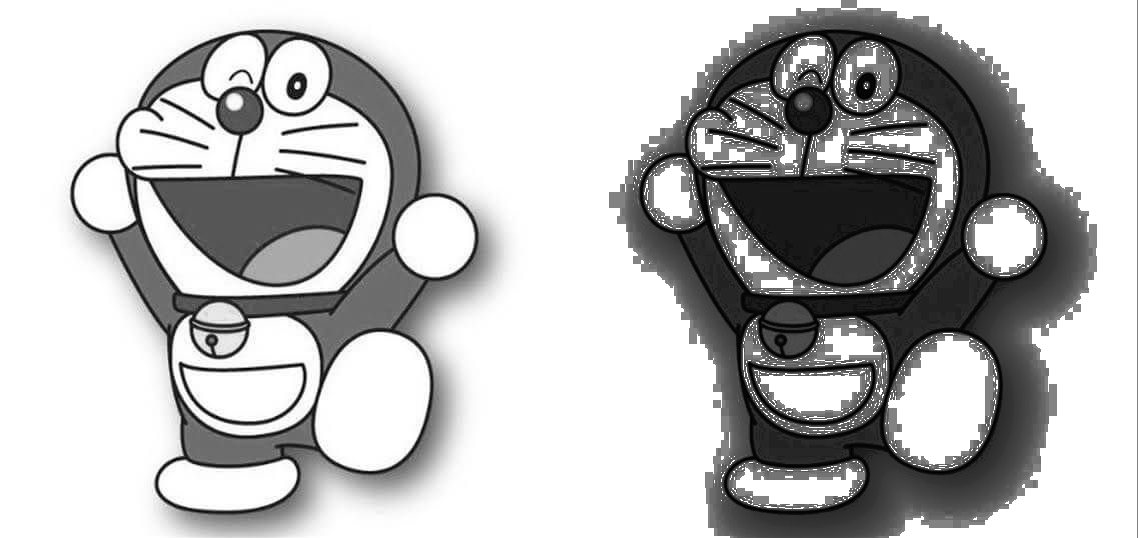

In [ ]:
cv2_imshow(res)

# 1(b)THRESHOLDING

In [ ]:
# Importing Libraries
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Reading the file

image = cv2.imread('/content/1.jpg')
converted_gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

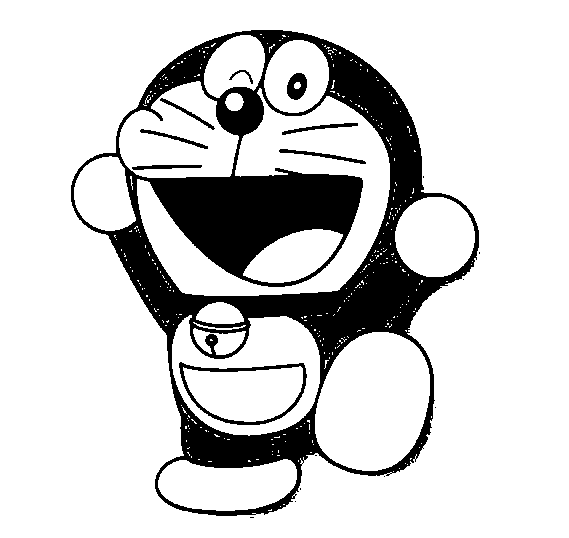

In [ ]:
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)

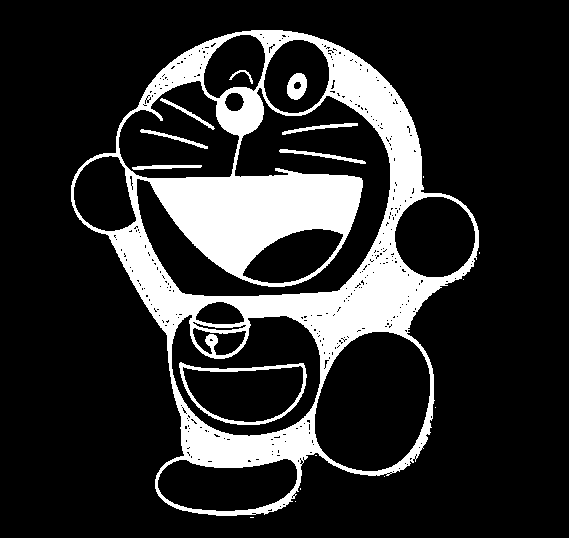

In [ ]:
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2)

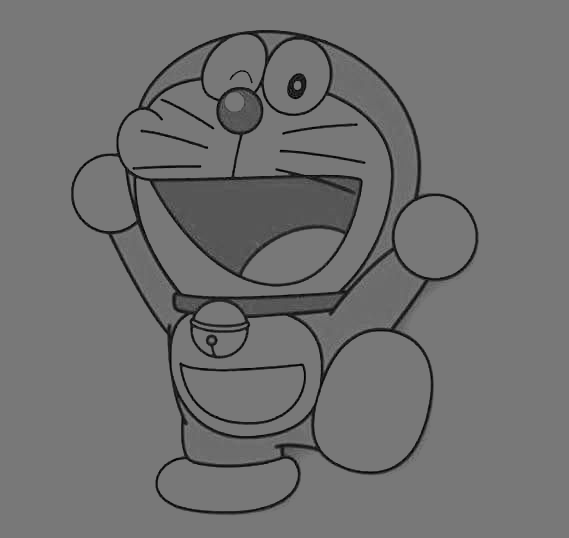

In [ ]:
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
cv2_imshow(thresh3)

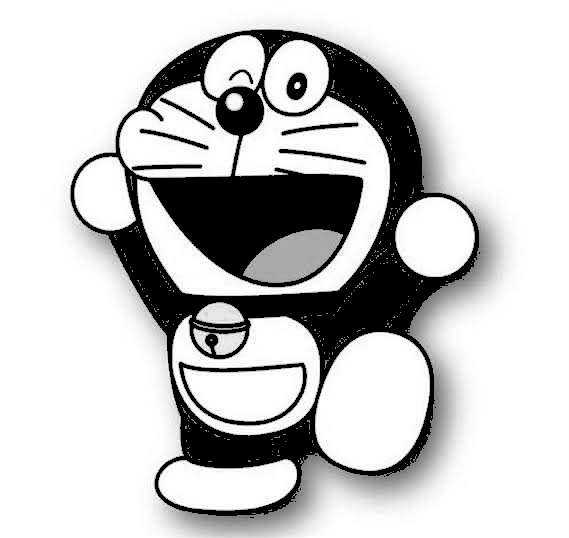

In [ ]:
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
cv2_imshow(thresh4)

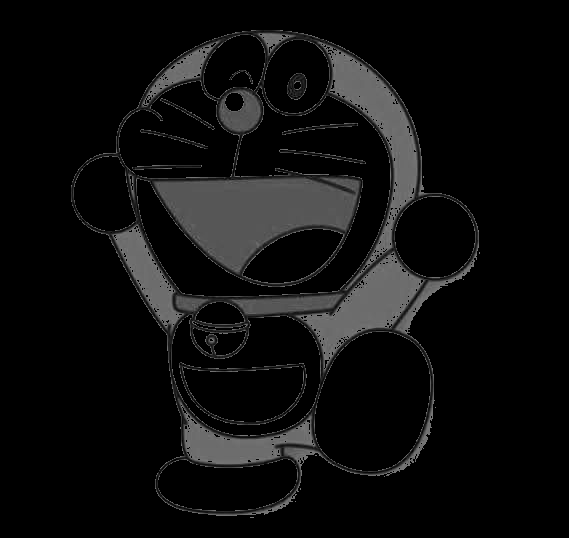

In [ ]:
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(thresh5)

#DATA AUGMENTATION

In [ ]:
# Importing Libraries

import cv2
import random
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/1.jpg')

In [ ]:
def fill(image, height, width):
  resized_image = cv2.resize(image, (height, width), cv2.INTER_CUBIC)
  return resized_image

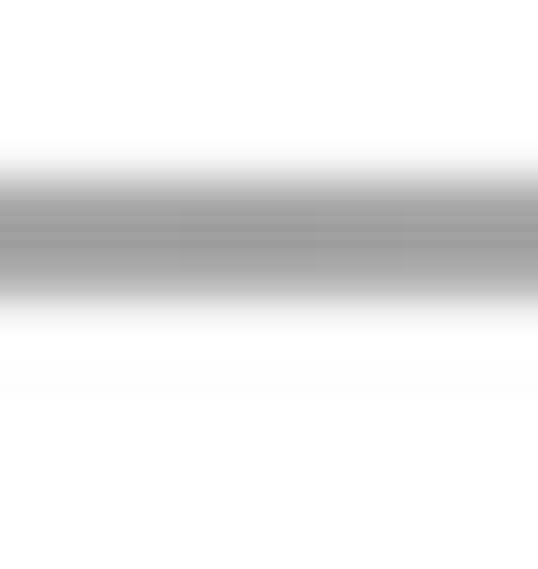

In [ ]:
def horizontal_shift(image, ratio=0):
  if ratio > 1 or ratio < 0:
    print('Value should be less than 1 and greater than 0')
    return image
  ratio = random.uniform(-ratio, ratio)
  height, width = image.shape[:2]
  to_shift = width * ratio
  if ratio > 0:
    image = image[int(width - to_shift), :]
  if ratio < 0:
    image = image[int(-1 * to_shift):, :]

  image = fill(image, height, width)
  return image


result_image = horizontal_shift(image, 0.4)
cv2_imshow(result_image)


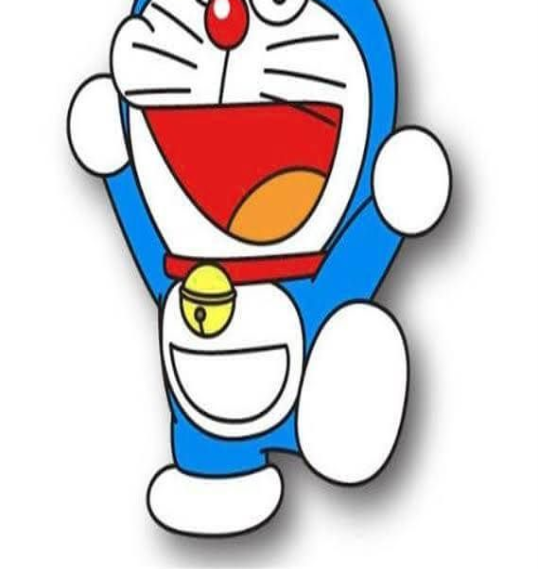

In [ ]:
def vertical_shift(image, ratio=0):
  if ratio > 1 or ratio < 0:
    print('Value should be less than 1 and greater than 0')
    return image
  ratio = random.uniform(-ratio, ratio)
  height, width = image.shape[:2]
  to_shift = height * ratio
  if ratio > 0:
    image = image[int(height - to_shift), :]
  if ratio < 0:
    image = image[int(-1 * to_shift):, :]

  image = fill(image, height, width)
  return image


result_image = vertical_shift(image, 0.4)
cv2_imshow(result_image)


#2) Build a Neural Network

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_values = np.exp(x - np.max(x))
    return exp_values / np.sum(exp_values)

def initialize_parameters(input_size, hidden_size, output_size):
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    biases_input_hidden = np.zeros(hidden_size)

    weights_hidden_output = np.random.randn(hidden_size, output_size)
    biases_hidden_output = np.zeros(output_size)

    return weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output

def forward(inputs, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    hidden_output = sigmoid(np.dot(inputs, weights_input_hidden) + biases_input_hidden)
    output = softmax(np.dot(hidden_output, weights_hidden_output) + biases_hidden_output)
    return output

input_size = 4
hidden_size = 3
output_size = 2

weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output = initialize_parameters(input_size, hidden_size, output_size)

input_data = np.array([[0.1, 0.2, 0.3, 0.4]])

output = forward(input_data, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output)
print("Output probabilities:", output)

Output probabilities: [[0.11988756 0.88011244]]


#3) CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss :", test_loss)
print("Test Accuracy :",test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


# 4. RNN for stock price prediction

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import numpy as np

# Read the CSV file
df = pd.read_csv(r'Programs\tesla.csv',encoding='utf-8')
df.info()

# Convert the date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['date'])
df.set_index('Date', inplace=True)

# Plot the close price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

# Prepare the data
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=0)

# Prepare test data
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Make predictions
predictions = model.predict(x_test,verbose=0)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
print("Predictions:", predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error:", rmse)


FileNotFoundError: [Errno 2] No such file or directory: 'Programs\\tesla.csv'

# 5.RNN for Next word prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import regex as re

def file_to_sentence_list(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    sentences = [sentence.strip() for sentence in re.split(r'(?<=[.!?])\s+', text) if sentence.strip()]

    return sentences

file_path = '/content/MS_Dhoni.txt'
text_data = file_to_sentence_list(file_path)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=10, verbose=1)

seed_text = "In the Indian Premier League (IPL), Dhoni plays for "
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)


Epoch 1/10
130/130 [==============================] - 12s 76ms/step - loss: 6.1870 - accuracy: 0.0637
Epoch 2/10
130/130 [==============================] - 4s 29ms/step - loss: 5.7873 - accuracy: 0.0750
Epoch 3/10
130/130 [==============================] - 2s 14ms/step - loss: 5.7062 - accuracy: 0.0750
Epoch 4/10
130/130 [==============================] - 3s 22ms/step - loss: 5.6486 - accuracy: 0.0733
Epoch 5/10
130/130 [==============================] - 2s 17ms/step - loss: 5.5897 - accuracy: 0.0799
Epoch 6/10
130/130 [==============================] - 1s 11ms/step - loss: 5.4983 - accuracy: 0.0919
Epoch 7/10
130/130 [==============================] - 1s 7ms/step - loss: 5.3702 - accuracy: 0.0951
Epoch 8/10
130/130 [==============================] - 1s 9ms/step - loss: 5.2433 - accuracy: 0.1074
Epoch 9/10
130/130 [==============================] - 1s 9ms/step - loss: 5.1233 - accuracy: 0.1139
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Next predicted words: In the 

# GAN for MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

img_shape = (28, 28, 1)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

latent_dim = 100
generator = build_generator(latent_dim)
discriminator.trainable = False

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)

batch_size = 64
epochs = 100

for epoch in range(epochs):
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]
    labels_real = np.ones((batch_size, 1))

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_imgs = generator.predict(noise)
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_imgs, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_imgs, labels_fake)

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

        generated_images = generator.predict(noise)
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.imshow(generated_images[i, :, :, 0], cmap='gray')
            plt.axis('off')
        plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
        plt.close()

image_path = '/content/gan_generated_image_epoch_0.png'
display(Image(filename=image_path))


In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/training_set.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content/extracted/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extraction directory
extracted_files = os.listdir(extract_dir)
print("Contents of the extraction directory:")
print(extracted_files)


Contents of the extraction directory:
['training_set']


# CAT DOG CLASSIFICATION

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

train_generator = ImageDataGenerator().flow_from_directory(r'/content/extracted/training_set', target_size=(128, 128))

model.fit(train_generator, epochs=5)

image_path = r'/content/dog.4046.jpg'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = img_array / 255.0
image = np.expand_dims(img_array, axis=0)
prediction = model.predict(image)

if prediction[0][0] <= 0.5:
    print("DOG")
else:
    print("CAT")

Found 2023 images belonging to 2 classes.
Epoch 1/5
64/64 [==============================] - 6s 52ms/step - loss: 224.4809 - accuracy: 0.5472
Epoch 2/5
64/64 [==============================] - 3s 45ms/step - loss: 2.7984 - accuracy: 0.7276
Epoch 3/5
64/64 [==============================] - 4s 56ms/step - loss: 0.5469 - accuracy: 0.8685
Epoch 4/5
64/64 [==============================] - 3s 44ms/step - loss: 0.2178 - accuracy: 0.9511
Epoch 5/5
64/64 [==============================] - 3s 44ms/step - loss: 0.0978 - accuracy: 0.9723


1/1 [==============================] - 0s 97ms/step
CAT


# HUMAN - HORSE

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

train_generator = ImageDataGenerator().flow_from_directory(r'/training dataset', target_size=(128, 128))

model.fit(train_generator, epochs=5)

image_path = r'/test image'
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = img_array / 255.0
image = np.expand_dims(img_array, axis=0)
prediction = model.predict(image)

if prediction[0][0] <= 0.5:
    print("HUMAN")
else:
    print("HORSE")

# LINEAR CLASSIFICATION WITH TENSORFLOW

In [ ]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :2]  # Considering only the first two features
y = (iris.target == 0).astype(int)  # Binary classification: Setosa or not

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)

for i in range(10):
    print(f"True label: {y_test[i]}, Predicted label: {predictions_binary[i][0]}")


# IMAGE CLASSIFICATION WITH TENSORFLOW

In [ ]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

def model_arch():
    model = Sequential()

    model.add(Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    return model

model = model_arch()
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

history = model.fit(trainX.reshape(-1, 28, 28, 1).astype(np.float32), trainy.astype(np.float32), epochs=10, steps_per_epoch=100, validation_split=0.33)

labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

print(len(testX))
predictions = model.predict(testX[6:7].reshape(-1, 28, 28, 1))
label = labels[np.argmax(predictions)]

print(label)

plt.imshow(testX[6:7][0], cmap='gray')
plt.show()
